In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
seacnn = pd.read_csv("../results/output_places_US_knn_seacnn_mem_exp.csv")
seacnn = seacnn[~seacnn['name'].isin(['no_clean', 'expire', 'expire+knn'])]

# name_map = {
#     'no_clean': 'No VC',
#     'expire': "VC (Expiration)",
#     'expire+knn': "VC (Expiration + KNN boundry)"
# }

# seacnn['name'] = seacnn['name'].apply(lambda x: name_map[x])

# seacnn['name'] = "SEA-CNN"

res = pd.concat([
    seacnn.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']],
]).rename(columns={'create_mem': "After creation", 'search_mem': "After search"})

res

,After creation,After search,num_queries,name
12,3671160,8322144,10000,NO
13,173419768,235924744,500000,NO
14,344985184,468093664,1000000,NO
15,859934112,1159602040,2500000,NO
16,3671160,8329560,10000,EXPIRE
17,173419768,235992344,500000,EXPIRE
18,344985184,468177144,1000000,EXPIRE
19,859934112,1159673200,2500000,EXPIRE


<AxesSubplot:xlabel='No. of queries', ylabel='Index size (MB)'>

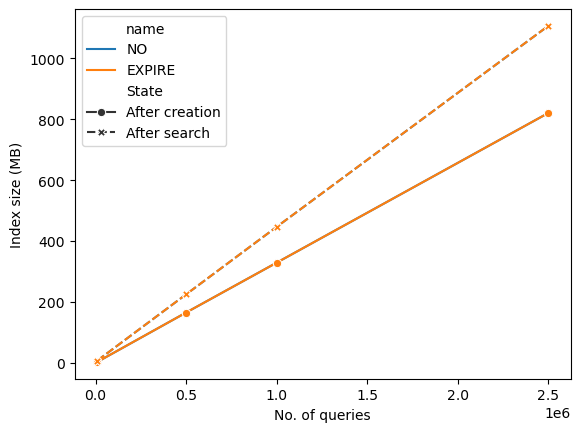

In [14]:
out = res.melt(id_vars=["name", 'num_queries'], var_name="State")
out['value'] = out['value'] / 1048576
out = out.rename(columns={"num_queries": "No. of queries", 'value': "Index size (MB)"})

sns.lineplot(x="No. of queries", y='Index size (MB)', hue='name', style='State', data=out, errorbar=None, markers=True)

In [15]:
out.pivot(index=['No. of queries'], columns=["State", 'name'], values='Index size (MB)')
# out

State          After creation             After search             
name                       NO      EXPIRE           NO       EXPIRE
No. of queries                                                     
10000                3.501091    3.501091     7.936615     7.943687
500000             165.385979  165.385979   224.995369   225.059837
1000000            329.003510  329.003510   446.408905   446.488518
2500000            820.097076  820.097076  1105.882683  1105.950546